<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Fractal_Quantum_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 6.7 MB/s 
     |████████████████████████████████| 18.0 MB 6.8 MB/s 
     |████████████████████████████████| 240 kB 72.1 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 112 kB 60.8 MB/s 
     |████████████████████████████████| 943 kB 60.3 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 1.6 MB 31.5 MB/s 
     |████████████████████████████████| 4.1 MB 40.7 MB/s 
     |████████████████████████████████| 112 kB 61.1 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.1-py3-none-any.whl size=12067 sha256=eab2ceb62fd516d4f4a298988d8d05a544784b95376e2ab3685bcc286d9e6e62
  Stored in directory: /root/.cache/pip/wheels/1c/3c/a3/bf8c2

In [ ]:
pip install ibm_quantum_widgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 6.6 MB/s 


In [ ]:
pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing standard python libraries
import numpy as np
import pandas as pd
from math import pi, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import * # plot_bloch_multivector
from ibm_quantum_widgets import * # CircuitComposer
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Statevector

# Loading your IBM Quantum account(s)
provider = IBMQ.enable_account('582017d35814ac4be93620aa4776e3e041a99459c2824894fe07b0a8d65e0b69fd64217ff4f6756edada9c8bf86437cf0d11a8eb4c4a61f8cbfc5c24b13971c5')

IBMQAccountError: ignored

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Start with an one qubit quantum circuit yielding a nice fractal. Change the circuit as you like.
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.u(pi/4, -pi/3, pi/8, 0)
editor = CircuitComposer(circuit=circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7feb0ad4ad10>)

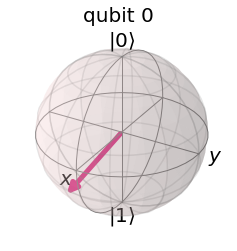

In [ ]:
# View the circiut quantum state on the Bloch sphere 
qc1 = editor.circuit
plot_bloch_multivector(qc1)

z=  (0.4+0.23j)


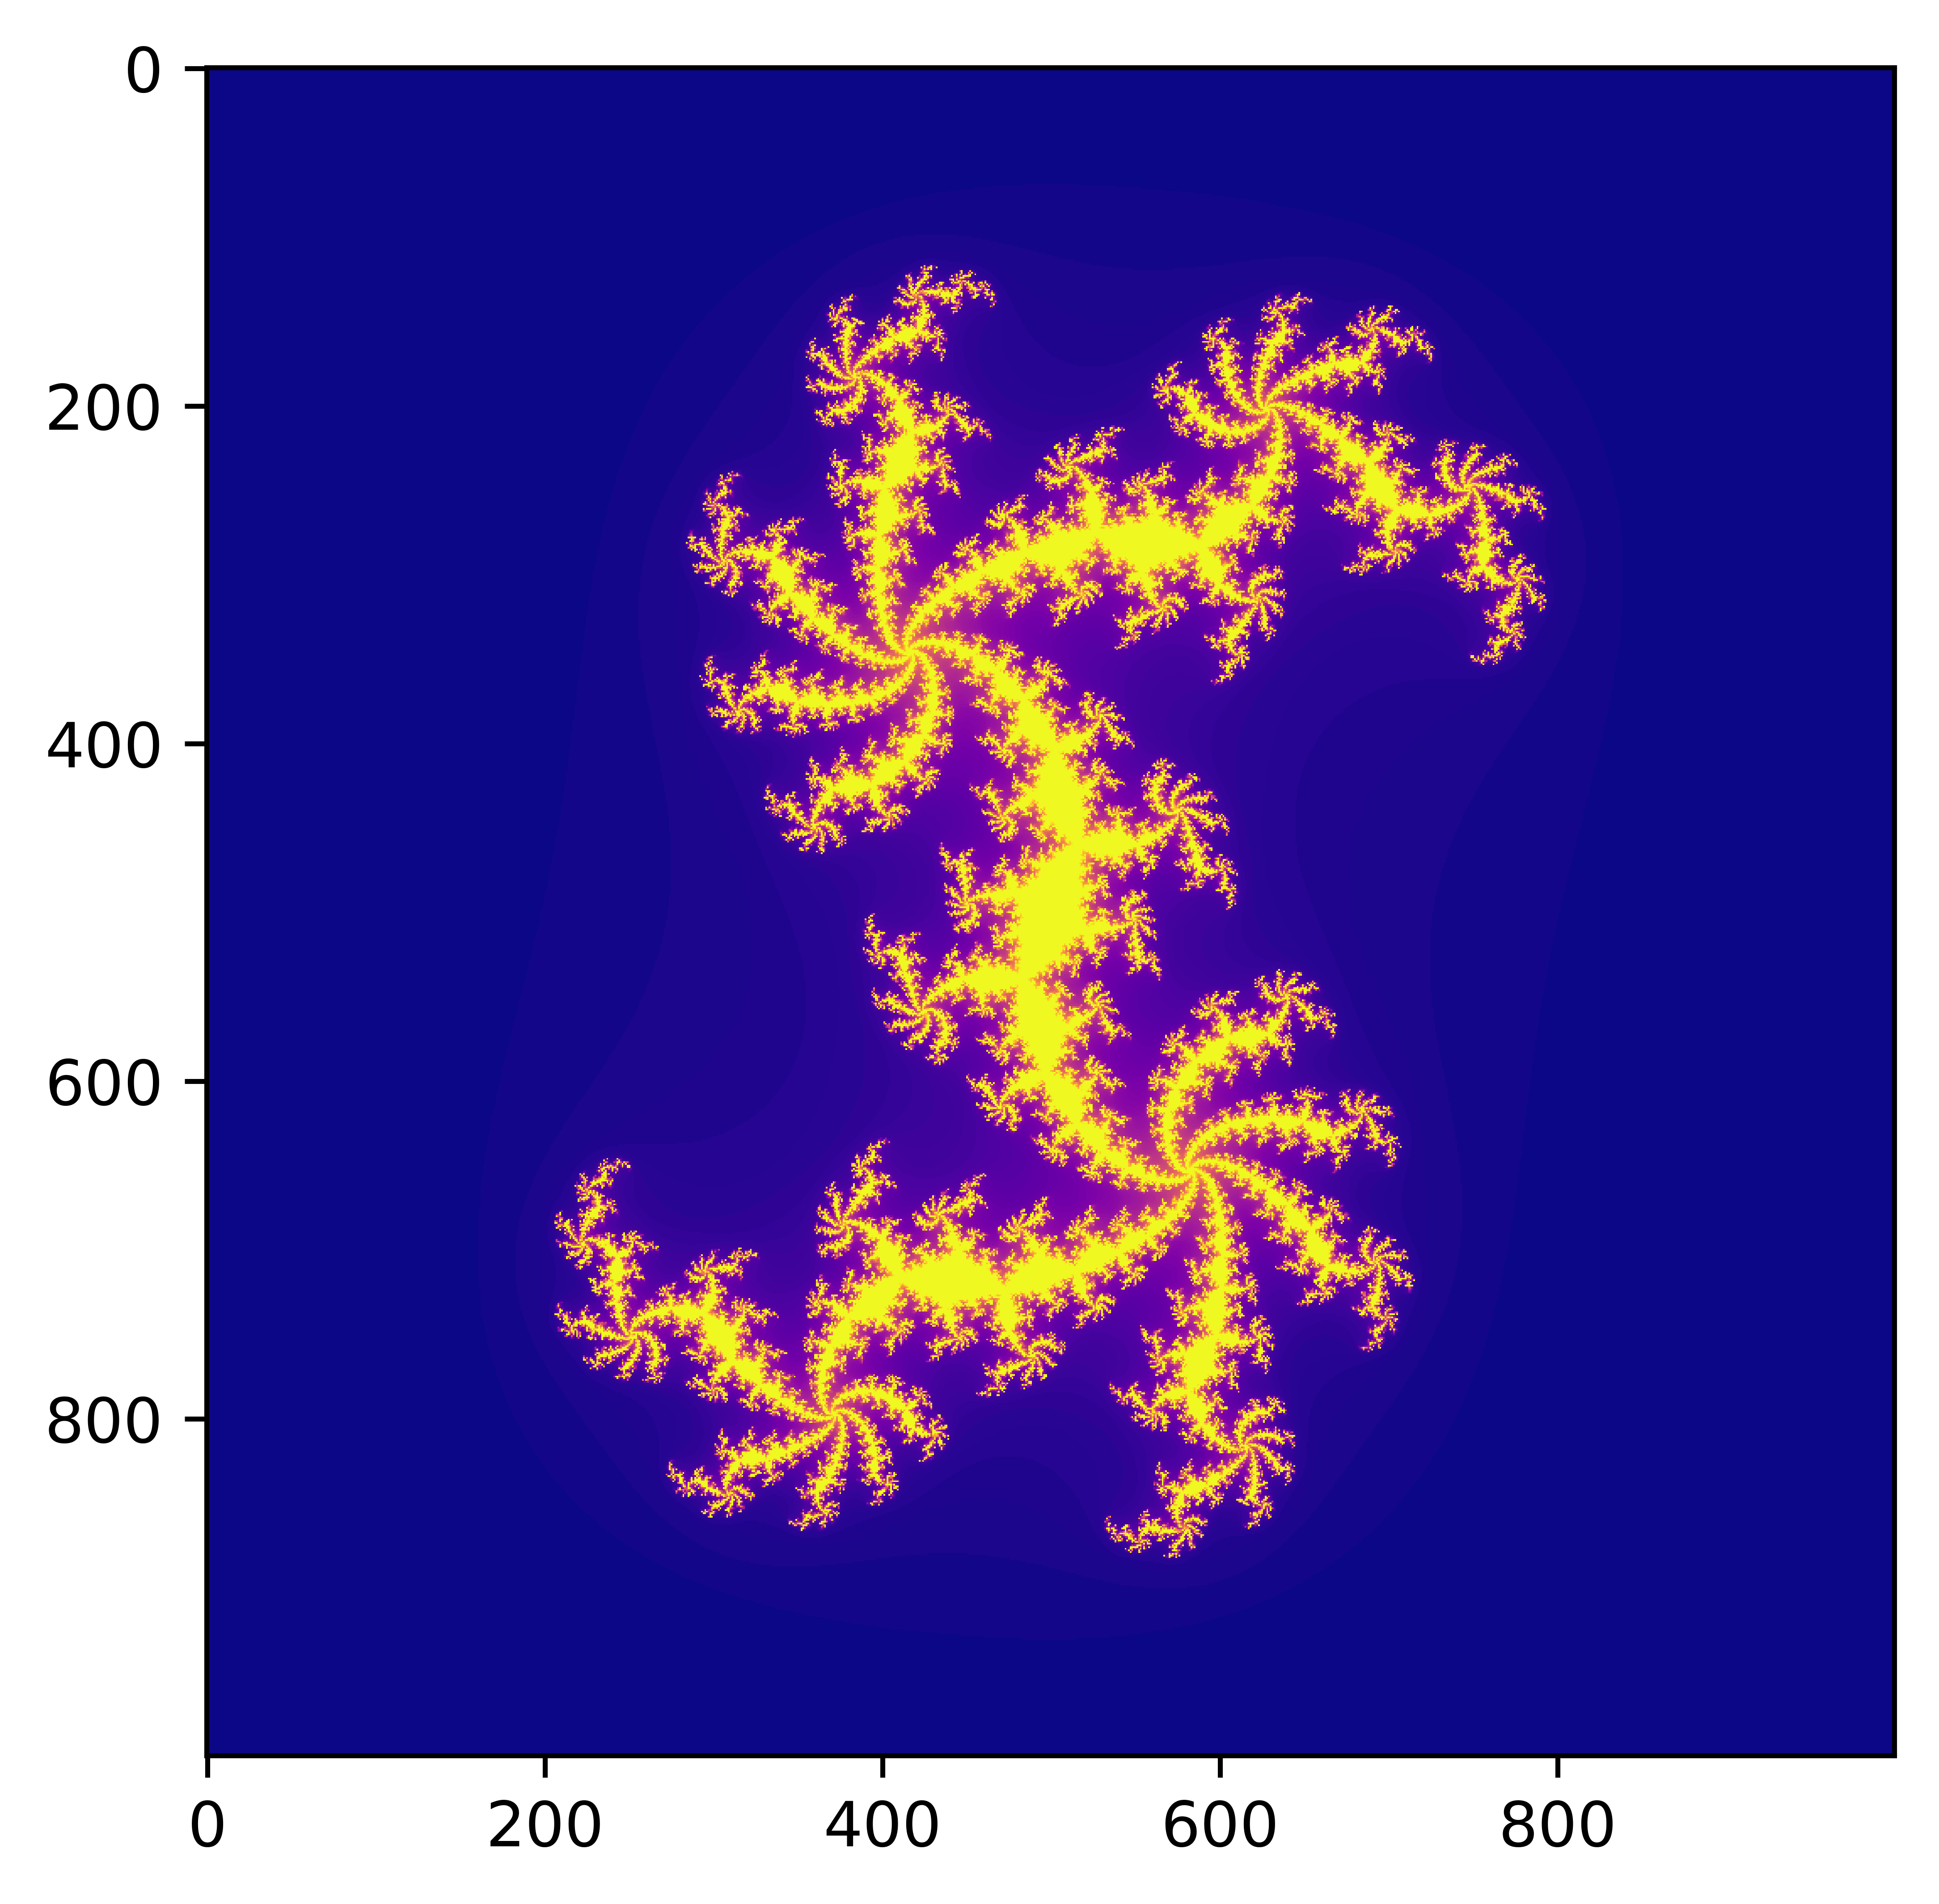

In [ ]:
# Run the circuit with the state vector simulator to obtain a noise-free fractal.
backend = Aer.get_backend('statevector_simulator')
out = execute(qc1,backend).result().get_statevector()
#print(out)

plt.figure(figsize=(8,5), dpi=1000)

# Extract the first element of the state vector as z0 and the second element as z1.
z0 = out.data[0]
z1 = out.data[1]


# Goal: One complex number for the Julia set fractal. 
if z1.real != 0 or z1.imag != 0:
    z = z0/z1
    z = round(z.real, 2) + round(z.imag, 2) * 1j
else:
     z = 0 

print("z= ",z)

# Define the size
size = 1000
heightsize = size
widthsize = size


def julia_set(c=z, height=heightsize, width=widthsize, x=0, y=0, zoom=1, max_iterations=100):

    # To make navigation easier we calculate these values
    x_width = 1.5
    y_height = 1.5*height/width
    x_from = x - x_width/zoom
    x_to = x + x_width/zoom
    y_from = y - y_height/zoom
    y_to = y + y_height/zoom
    
    # Here the actual algorithm starts and the z paramter is defined for the Julia set function
    x = np.linspace(x_from, x_to, width).reshape((1, width))
    y = np.linspace(y_from, y_to, height).reshape((height, 1))
    z = x + 1j * y
    
    # Initialize c to the complex number obtained from the quantum circuit
    c = np.full(z.shape, c)
    
    # To keep track in which iteration the point diverged
    div_time = np.zeros(z.shape, dtype=int)
    
    # To keep track on which points did not converge so far
    m = np.full(c.shape, True, dtype=bool)
    
    for i in range(max_iterations):
        z[m] = z[m]**2 + c[m] 
        m[np.abs(z) > 2] = False
        div_time[m] = i
    return div_time


# plot the Julia set fractal
plt.imshow(julia_set(), cmap='inferno') # viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.show()

In [ ]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-research-2', group='uni-minnesotta-tw-1', project='main')>]

In [ ]:
# Find the least busy system that has at least 1 qubit
from qiskit.providers.ibmq import least_busy

ibmq_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1 and 
                                   not x.configuration().simulator and x.status().operational==True))

print("The least busy quantum computer now is",ibmq_backend)

ModuleNotFoundError: ignored

In [ ]:
# Add measurement - used to calculate the modified state vector
qc1.measure(0, 0)
qc1.draw(scale=2)

┌───┐┌─────────────────┐┌─┐┌─┐┌─┐┌─┐
  q: ┤ H ├┤ U(π/4,-π/3,π/8) ├┤M├┤M├┤M├┤M├
     └───┘└─────────────────┘└╥┘└╥┘└╥┘└╥┘
c: 1/═════════════════════════╩══╩══╩══╩═
                              0  0  0  0

In [ ]:
# Define the number of shots for the execution. 
shotno=2048

# Run the circuit on a real quantum computer. NB! This may take a while.
job_ibmq = execute(qc1, ibmq_backend, shots=shotno)
result = job_ibmq.result()

AttributeError: ignored

(0.4+0.23j) (0.4282044872994061+0.24363777141197662j)


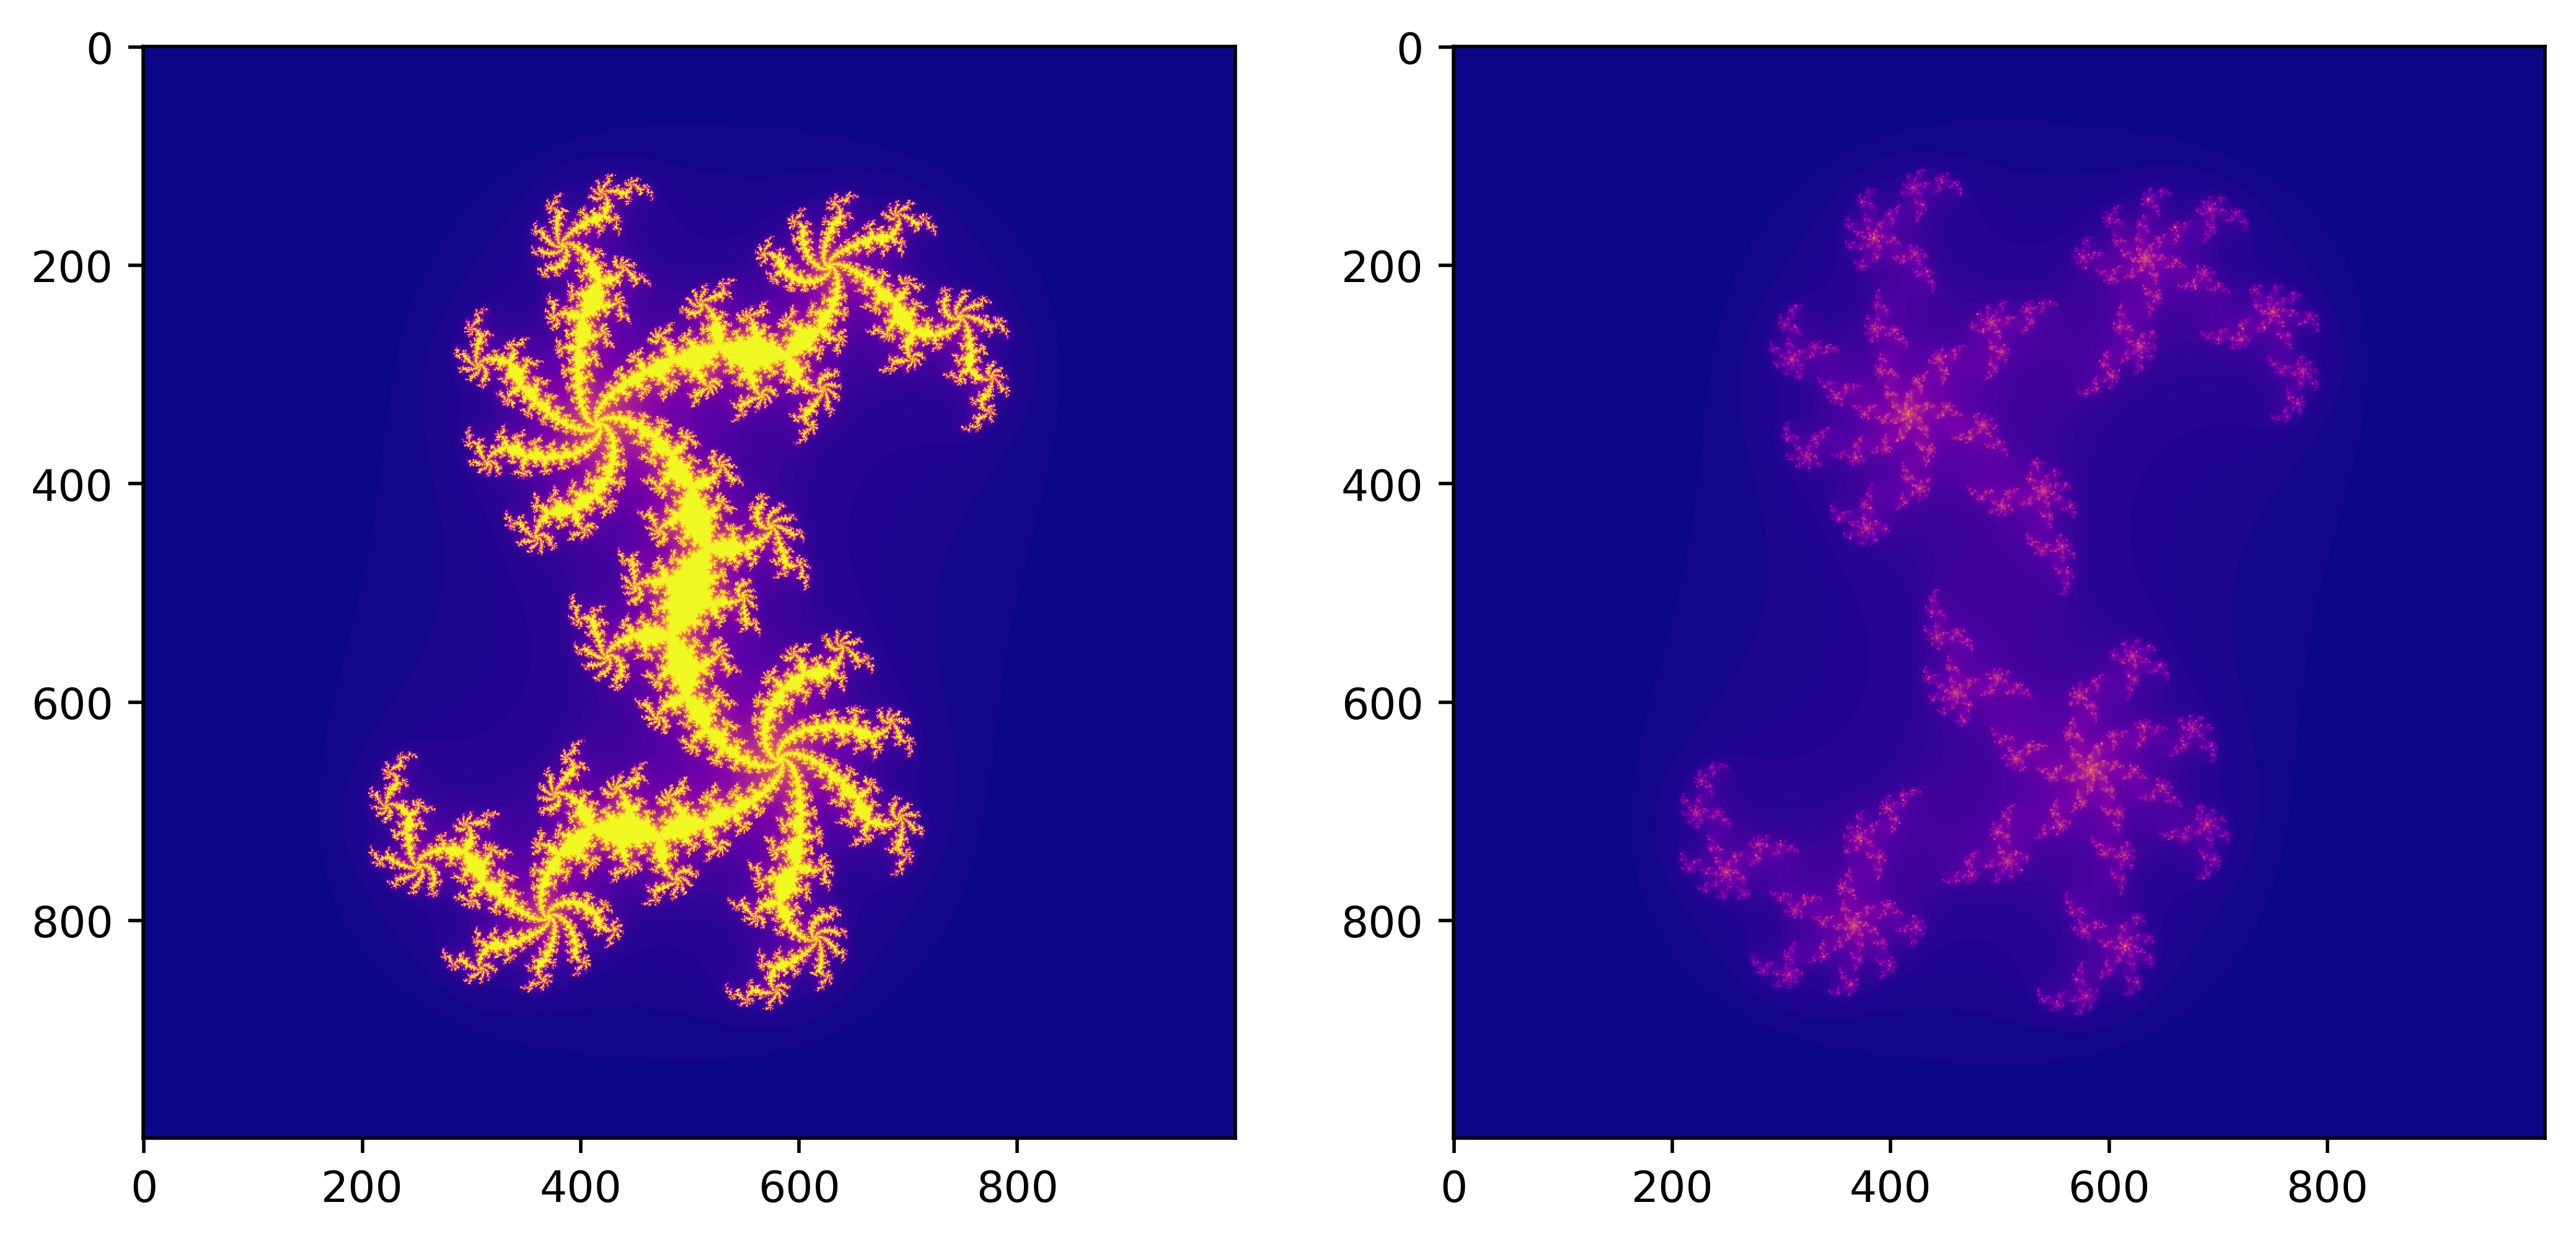

In [ ]:
# Get count measurement results
counts = result.get_counts()


prob0qc = counts['0']/shotno
prob1qc = counts['1']/shotno
#print("Observed probabilities of measuring the computational basis states", round(prob0qc,3), round(prob1qc,3))

#print("Statevector: ", out)
#print("Statevector probilities of measuring the basis states: ", out.probabilities())
prob0statevec = out.probabilities()[0]
prob1statevec = out.probabilities()[1]

# one simple approach to calculate a quantum computer-modified complex number # amplitude^2 = probability
z0qc = z0*sqrt(prob0qc/prob0statevec)
z1qc = z1*sqrt(prob1qc/prob1statevec)
zqc = z0qc/z1qc
#zqcminus = -z0qc/z1qc
#print(z,zqc,zqcminus)

# compare the simulator state vector with the-running-on-a-real-quantum-computer modified state vector
print(z,zqc)

# Plot both Julia set fractals for comparison - the simulator based on the left and the modified on the right 
f, axarr = plt.subplots(1,2,figsize=(10, 10), dpi=500)
axarr[0].imshow(julia_set(c=z), cmap='inferno')
axarr[1].imshow(julia_set(c=zqc), cmap='inferno')